In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Partie 1 : Lier les tables web et erp

## Importation des tableaux erp, web et liaison

In [3]:
erp = pd.read_excel('/content/drive/MyDrive/Formation Openclassroom/Projet 5/erp.xlsx')
erp

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [4]:
web = pd.read_excel('/content/drive/MyDrive/Formation Openclassroom/Projet 5/web.xlsx')
web

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [5]:
liaison = pd.read_excel('/content/drive/MyDrive/Formation Openclassroom/Projet 5/liaison.xlsx')
liaison

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


## Nettoyage table liaison

1. Je renomme la colonne "id_web" en "sku"

In [6]:
liaison.rename(columns = {'id_web':'sku'}, inplace = True)
liaison

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


2. Je supprime toutes les lignes en doublons ainsi que les lignes vides

In [7]:
liaison = liaison.drop_duplicates()

In [8]:
liaison = liaison.dropna()

In [9]:
liaison

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


## Nettoyage table web

1. Je commence par supprimer toutes les lignes pour lesquelles l'identifiant "sku" n'est pas renseigné 

In [10]:
web = web.dropna(subset = ['sku'])
web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


2. Je cherche si des doublons sont présents

In [11]:
web.duplicated(subset='sku')

0       False
1       False
2       False
3       False
4       False
        ...  
1508     True
1509     True
1510     True
1511     True
1512     True
Length: 1428, dtype: bool

3. Je constate effectivement la présence de doublons

Hypothèse => Chaque produit est présent en double dans le tableau

Donc, je regarde combien de lignes de mon tableaux sont des doublons

In [12]:
web.loc[web.duplicated(subset = 'sku',keep='first'),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


J'ai 714 lignes qui sont des doublons, soit la moitié de mes 1428 lignes de départ

4. J'ai identifié une colonne dont le contenu diffère entre mes lignes produits et leurs doublons

Je vais donc vérifier le contenu de cette colonne, puis ne conserver que les lignes pour lesquelles une valeur est indiquée dans cette colonne

In [13]:
pd.unique(web['tax_status'])

array(['taxable', nan], dtype=object)

In [14]:
web = web.loc[web['tax_status'] == 'taxable']
web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


J'obtiens bien un tableau avec 714 lignes qui correspondent à mes références d'articles 

5. Je revérifie que mon tableau ne contient plus de doublons

In [15]:
web.loc[web.duplicated(subset='sku')== True]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


J'ai bien supprimé tous mes doublons

## Jonction des tables web - liaison - erp

1. Je fais d'abord ma jonction entre web et liaison

In [16]:
liaison_web = pd.merge(liaison,web, how = 'outer', left_on ='sku', right_on='sku')
liaison_web

,product_id,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,15296,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,15300,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,19814,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,19815,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,7023,15891,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
730,7025,15887,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
731,7247,13127-1,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
732,7329,14680-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Ensuite entre erp et liaison

In [17]:
liaison_erp = pd.merge(liaison,erp, how = 'outer', on ='product_id')
liaison_erp

,product_id,sku,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock
...,...,...,...,...,...,...
820,7196,NaN,0,31.0,55,instock
821,7200,NaN,0,31.0,6,instock
822,7201,NaN,0,31.0,18,instock
823,7203,NaN,0,45.0,30,instock


3. Et enfin entre mes deux tableaux créés précédemment pour relier web et erp

In [18]:
web_erp = pd.merge(liaison_erp,liaison_web,how='outer', on='product_id')
web_erp

,product_id,sku_x,onsale_web,price,stock_quantity,stock_status,sku_y,virtual,downloadable,rating_count,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,1,24.2,0,outofstock,15298,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,15296,1,34.3,0,outofstock,15296,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,15300,1,20.8,0,outofstock,15300,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,19814,1,14.1,0,outofstock,19814,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,19815,1,46.0,0,outofstock,19815,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7196,NaN,0,31.0,55,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,7200,NaN,0,31.0,6,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,7201,NaN,0,31.0,18,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,7203,NaN,0,45.0,30,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4. Je supprime la colonne "sku" en double

In [19]:
del web_erp['sku_y']

In [20]:
web_erp.rename(columns = {'sku_x':'sku'}, inplace = True)

In [21]:
web_erp

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,1,24.2,0,outofstock,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,15296,1,34.3,0,outofstock,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,15300,1,20.8,0,outofstock,0.0,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,19814,1,14.1,0,outofstock,0.0,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,19815,1,46.0,0,outofstock,0.0,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7196,NaN,0,31.0,55,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,7200,NaN,0,31.0,6,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,7201,NaN,0,31.0,18,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,7203,NaN,0,45.0,30,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
web_erp.loc[web_erp['sku'].isnull() == True]

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
734,4055,NaN,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,4090,NaN,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
736,4092,NaN,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,4195,NaN,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
738,4209,NaN,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7196,NaN,0,31.0,55,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,7200,NaN,0,31.0,6,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,7201,NaN,0,31.0,18,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,7203,NaN,0,45.0,30,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Nettoyage des NA

In [23]:
web_erp.dropna(subset=['product_id'])

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,1,24.2,0,outofstock,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,15296,1,34.3,0,outofstock,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,15300,1,20.8,0,outofstock,0.0,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,19814,1,14.1,0,outofstock,0.0,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,19815,1,46.0,0,outofstock,0.0,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7196,NaN,0,31.0,55,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,7200,NaN,0,31.0,6,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,7201,NaN,0,31.0,18,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,7203,NaN,0,45.0,30,instock,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Je regarde combien de colonnes ne contiennent que des valeurs manquantes

In [24]:
web_erp.isnull().sum()

product_id                 0
sku                       91
onsale_web                 0
price                      0
stock_quantity             0
stock_status               0
virtual                  111
downloadable             111
rating_count             111
average_rating           111
total_sales              111
tax_status               111
tax_class                825
post_author              111
post_date                111
post_date_gmt            111
post_content             825
post_title               111
post_excerpt             111
post_status              111
comment_status           111
ping_status              111
post_password            825
post_name                111
post_modified            111
post_modified_gmt        111
post_content_filtered    825
post_parent              111
guid                     111
menu_order               111
post_type                111
post_mime_type           825
comment_count            111
dtype: int64

Colonnes remplies uniquement de Na : 

*   tax_class
*   post_content
*   post_password
*   post_content_filtered
*   post_mime_type





2. Je supprime donc ces colonnes

In [25]:
web_erp = web_erp.dropna(axis=1,how='all')
web_erp.head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,3847,15298,1,24.2,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1,3849,15296,1,34.3,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
2,3850,15300,1,20.8,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,4032,19814,1,14.1,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
4,4039,19815,1,46.0,0,outofstock,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


In [26]:
web_erp.shape[1]

28

In [27]:
web_erp.isnull().sum()

product_id             0
sku                   91
onsale_web             0
price                  0
stock_quantity         0
stock_status           0
virtual              111
downloadable         111
rating_count         111
average_rating       111
total_sales          111
tax_status           111
post_author          111
post_date            111
post_date_gmt        111
post_title           111
post_excerpt         111
post_status          111
comment_status       111
ping_status          111
post_name            111
post_modified        111
post_modified_gmt    111
post_parent          111
guid                 111
menu_order           111
post_type            111
comment_count        111
dtype: int64

# Partie 2 : Calcul du chiffre d'affaire

In [28]:
web_erp["Chiffre d'affaire"] = web_erp['price']*web_erp['total_sales']
web_erp[['product_id','price','total_sales',"Chiffre d'affaire"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,product_id,price,total_sales,Chiffre d'affaire
0,3847,24.2,6.0,145.2
1,3849,34.3,0.0,0.0
2,3850,20.8,0.0,0.0
3,4032,14.1,3.0,42.3
4,4039,46.0,0.0,0.0
...,...,...,...,...
820,7196,31.0,NaN,NaN
821,7200,31.0,NaN,NaN
822,7201,31.0,NaN,NaN
823,7203,45.0,NaN,NaN


In [29]:
print("Le chiffre d'affaires total réalisé en ligne est de", web_erp["Chiffre d'affaire"].sum(axis = 0),"euros ")

Le chiffre d'affaires total réalisé en ligne est de 70568.6 euros 


# Partie 3 : Détection des valeurs de prix aberrantes 

1. Je trie mon tableau par ordre croissant de prix afin de visualiser les valeurs de prix les plus basses et les plus élevées

In [30]:
web_erp[['product_id','price','total_sales',"Chiffre d'affaire"]].sort_values('price')

,product_id,price,total_sales,Chiffre d'affaire
664,6129,5.2,0.0,0.0
573,5777,5.7,0.0,0.0
98,4173,5.7,13.0,74.1
97,4172,5.7,43.0,245.1
99,4174,5.7,6.0,34.2
...,...,...,...,...
566,5767,175.0,0.0,0.0
219,4402,176.0,13.0,2288.0
601,5892,191.3,3.0,573.9
434,5001,217.5,0.0,0.0


2. Je génère un histogramme afin de visualiser la distribution de ma variable "price"

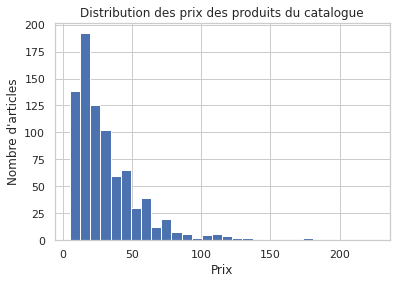

In [48]:
plt.hist(web_erp['price'], bins = 30)
plt.title('Distribution des prix des produits du catalogue')
plt.xlabel('Prix')
plt.ylabel("Nombre d'articles")
plt.show()

3. Je génère une boîte à moustache afin de visualiser les valeurs de prix statistiquement abérrantes 

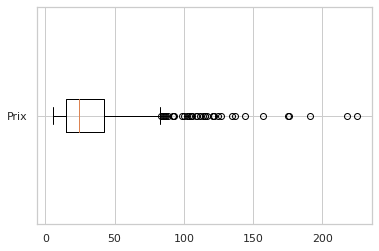

In [56]:
plt.boxplot(web_erp['price'], vert =False, widths = 0.15, labels = ['Prix'], manage_ticks= True )
plt.show()

4. Je calcule les valeurs limites de la distribution de mes données en utilisant l'écart inter-quartile 

In [34]:
Q1 = np.percentile(web_erp['price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(web_erp['price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

27.4

In [35]:
sup = Q3 + 1.5*IQR
sup

83.1

5. Je filtre mes données afin de n'afficher que les produits pour lesquels le prix est considéré comme statistiquement abérrant

In [51]:
web_erp.loc[web_erp['price']>(Q3 + 1.5*IQR)]

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,Chiffre d'affaire
63,4115,15382,1,100.0,11,instock,0.0,0.0,0.0,0.0,...,closed,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
65,4132,11668,1,88.4,5,instock,0.0,0.0,0.0,0.0,...,closed,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,2020-02-20 08:55:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
200,4352,15940,1,225.0,0,outofstock,0.0,0.0,0.0,0.0,...,closed,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,1125.0
202,4355,12589,1,126.5,2,instock,0.0,0.0,0.0,0.0,...,closed,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,1391.5
206,4359,13853,1,85.6,0,outofstock,0.0,0.0,0.0,0.0,...,closed,champagne-larmandier-bernier-grand-cru-vieille...,2019-12-23 09:30:11,2019-12-23 08:30:11,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,85.6
219,4402,3510,1,176.0,8,instock,0.0,0.0,0.0,0.0,...,closed,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,2288.0
220,4404,3507,1,108.5,2,instock,0.0,0.0,0.0,0.0,...,closed,cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,2020-08-12 07:30:16,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,217.0
222,4406,7819,1,157.0,3,instock,0.0,0.0,0.0,0.0,...,closed,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
223,4407,3509,1,104.0,6,instock,0.0,0.0,0.0,0.0,...,closed,cognac-frapin-cigar-blend,2020-07-04 09:45:03,2020-07-04 07:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,104.0
229,4582,12857,1,109.6,7,instock,0.0,0.0,0.0,0.0,...,closed,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,0.0
